# Overview of Today's Class

# Today's Coding Topics
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-summmer/2023-07-17/notebook/concept_and_code_demo.ipynb)

* Recap of previous lecture
* Hands-on Example
    * Decision Tree Model
    * Random Forest Model
    

# Decision Tree Model 

## Train and Visualize a Decision Tree

* The iris dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
![](./iris_data.png)
![](https://www.pngkey.com/png/detail/82-826789_iris-iris-sepal-and-petal.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

## import the dataset
iris = load_iris()

In [4]:
# iris

In [5]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
# iris

In [6]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [6]:
# iris['data']
type(iris.data)

numpy.ndarray

In [7]:
iris.data.shape

(150, 4)

In [8]:
iris['data'][:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

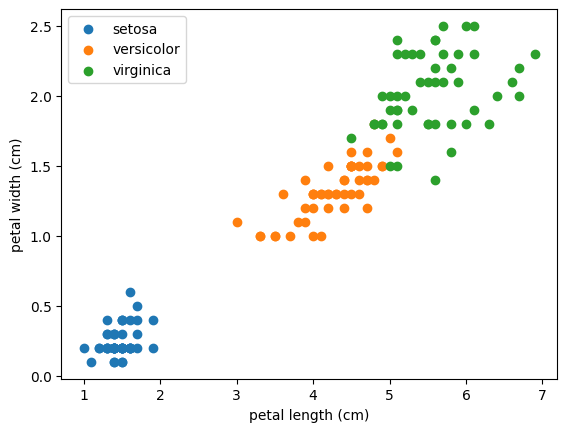

In [12]:
## visualize the data

plt.scatter(iris['data'][iris.target==0,2],iris['data'][iris.target==0,3], label='setosa')
plt.scatter(iris['data'][iris.target==1,2],iris['data'][iris.target==1,3], label='versicolor')
plt.scatter(iris['data'][iris.target==2,2],iris['data'][iris.target==2,3], label='virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

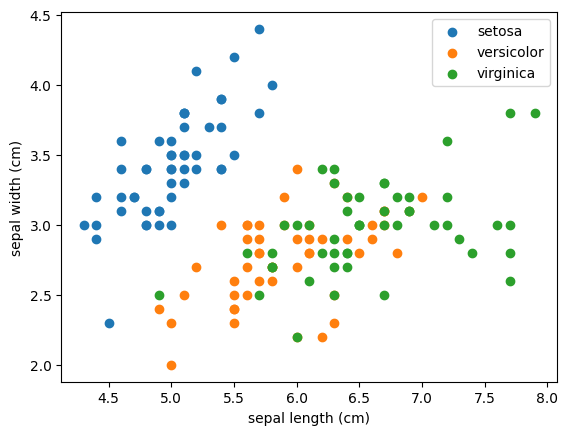

In [13]:
plt.scatter(iris['data'][iris.target==0,0],iris['data'][iris.target==0,1], label='setosa')
plt.scatter(iris['data'][iris.target==1,0],iris['data'][iris.target==1,1], label='versicolor')
plt.scatter(iris['data'][iris.target==2,0],iris['data'][iris.target==2,1], label='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

In [14]:
## fit a decision tree model

X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

**Reference**
* `graphviz`: https://graphviz.org/about/
    * Python library installation: `pip install graphviz`
    * Software Installation (if you are interested): https://graphviz.org/download/

In [17]:
%%sh

pip install graphviz
# you might need `brew install graphviz` to make the following visualization available

In [15]:
## visualize the tree

from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file='../pics/iris_tree.dot',
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

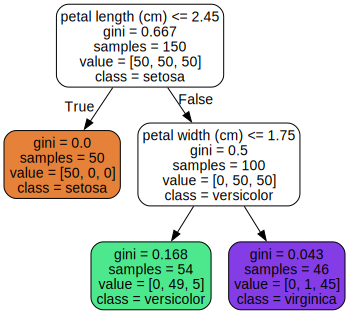

In [16]:
Source.from_file('../pics/iris_tree.dot')

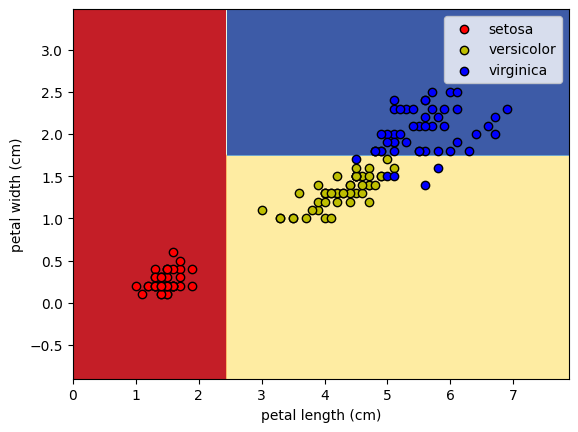

In [17]:
## visualize the decision boundaries

## generate the grid points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plot_step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

## plot the decision boundary
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

## plot the raw data
plt.scatter(iris['data'][iris.target==0,2],iris['data'][iris.target==0,3], label='setosa', c='r', edgecolor='black')
plt.scatter(iris['data'][iris.target==1,2],iris['data'][iris.target==1,3], label='versicolor', c='y', edgecolor='black')
plt.scatter(iris['data'][iris.target==2,2],iris['data'][iris.target==2,3], label='virginica',c='b', edgecolor='black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

## Evaluate the model

In [18]:
## evaluate the model
y_pred = tree_clf.predict(X)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y, y_pred, labels=[0,1,2])
cnf_matrix

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

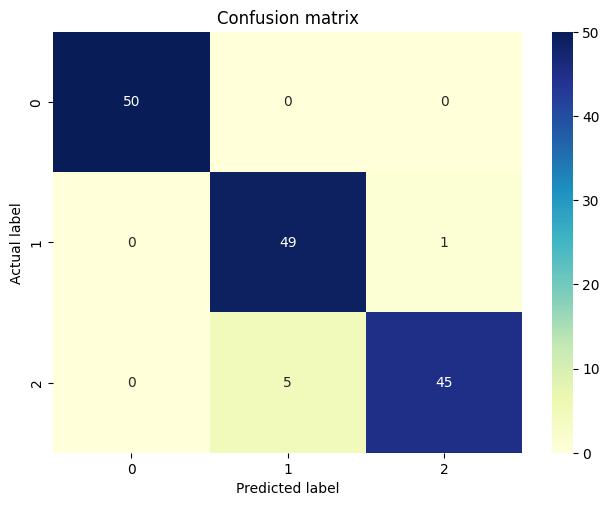

In [19]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Make predictions

In [20]:
X.shape

(150, 2)

In [30]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [31]:
x = tree_clf.predict_proba([[5, 1.5]])
x.shape

(1, 3)

In [21]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regularization

We are going to use the `moons` dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles
* Reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

In [22]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

In [23]:
Xm.shape

(100, 2)

In [24]:
ym.shape

(100,)

In [25]:
Xm[:3]

array([[ 0.20706864,  0.98150398],
       [ 1.16289446,  0.01844799],
       [ 0.1426683 , -0.1109168 ]])

In [26]:
ym[:3]

array([0, 1, 1])

In [27]:
set(ym)

{0, 1}

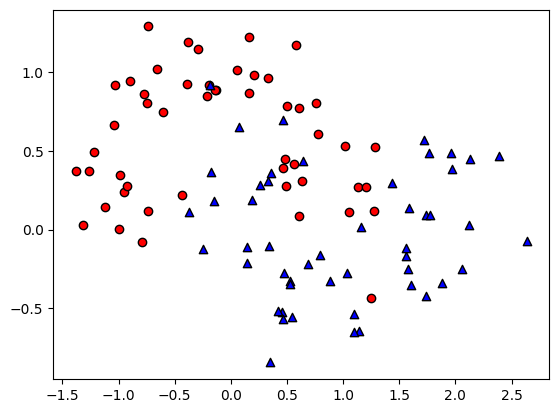

In [28]:
plt.scatter(Xm[ym==0,0],Xm[ym==0,1],c='r',marker='o',edgecolors='black')
plt.scatter(Xm[ym==1,0],Xm[ym==1,1],c='b',marker='^',edgecolors='black')
plt.show()

Text(0.5, 1.0, 'min_sample_leaf = 4')

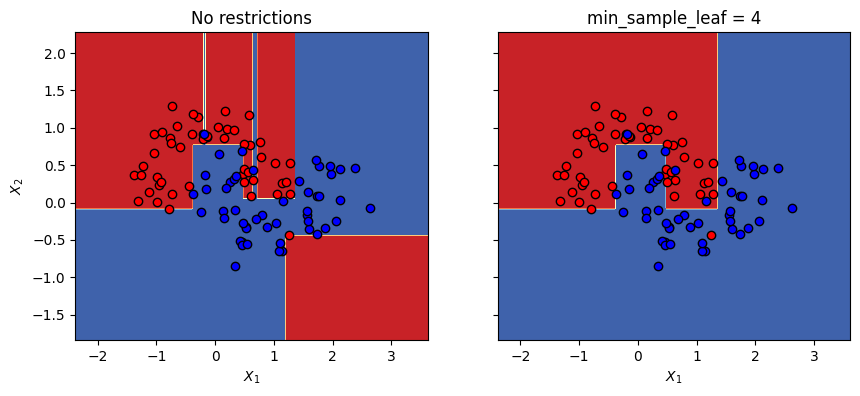

In [29]:
## Create 2 decision tree models with and without regularization
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

## Create a plotting area
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

## Create datasets for decision boundaries
x_min, x_max = Xm[:, 0].min() - 1, Xm[:, 0].max() + 1
y_min, y_max = Xm[:, 1].min() - 1, Xm[:, 1].max() + 1
plot_step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

## plot the 1st decision boundary
Z1 = deep_tree_clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
cs = axes[0].contourf(xx, yy, Z1, cmap=plt.cm.RdYlBu)

## plot the 2nd decision boundary
Z2 = deep_tree_clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
cs = axes[1].contourf(xx, yy, Z2, cmap=plt.cm.RdYlBu)

## Add scatter plots of raw data
axes[0].scatter(Xm[ym==0,0],Xm[ym==0,1],c='r', edgecolor='black')
axes[0].scatter(Xm[ym==1,0],Xm[ym==1,1],c='b', edgecolor='black')
axes[0].set_xlabel('$X_1$')
axes[0].set_ylabel('$X_2$')
axes[0].set_title('No restrictions')

axes[1].scatter(Xm[ym==0,0],Xm[ym==0,1],c='r', edgecolor='black')
axes[1].scatter(Xm[ym==1,0],Xm[ym==1,1],c='b', edgecolor='black')
axes[1].set_xlabel('$X_1$')
axes[1].set_title('min_sample_leaf = 4')



## Apply gridsearch methods to find the best model

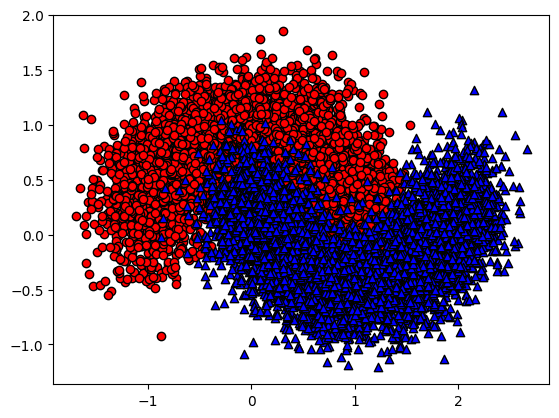

In [30]:
Xm, ym = make_moons(n_samples=10000, noise=0.25, random_state=53)

plt.scatter(Xm[ym==0,0],Xm[ym==0,1],c='r',marker='o',edgecolors='black')
plt.scatter(Xm[ym==1,0],Xm[ym==1,1],c='b',marker='^',edgecolors='black')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size=0.2, random_state=53)

In [43]:
3 * 98

294

In [32]:
%%time

from sklearn.model_selection import GridSearchCV

params = {'min_samples_split': [2, 3, 4], 'max_leaf_nodes': list(range(2, 100))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=53), params, verbose=1, cv=3, n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
CPU times: user 529 ms, sys: 237 ms, total: 766 ms
Wall time: 2.96 s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=53), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [33]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=15, random_state=53)

In [34]:
grid_search_cv.best_estimator_.min_samples_split

2

In [35]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
# y_pred.shape
accuracy_score(y_test, y_pred)

0.9355

In [48]:
sum(y_test==y_pred)/len(y_test)

0.9355

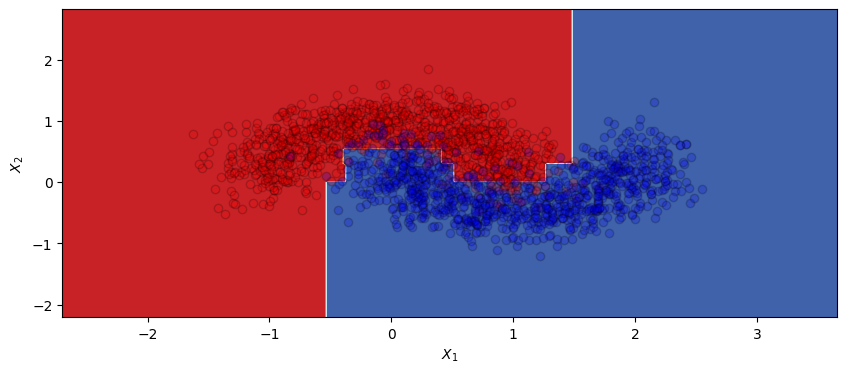

In [36]:
## Create a plotting area
fig, axes = plt.subplots(figsize=(10, 4))

## Create datasets for decision boundaries
x_min, x_max = Xm[:, 0].min() - 1, Xm[:, 0].max() + 1
y_min, y_max = Xm[:, 1].min() - 1, Xm[:, 1].max() + 1
plot_step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

## plot the 1st decision boundary
Z = grid_search_cv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = axes.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

## Add scatter plots of raw data
axes.scatter(X_test[y_test==0,0],X_test[y_test==0,1],c='r', edgecolor='black', alpha=0.2)
axes.scatter(X_test[y_test==1,0],X_test[y_test==1,1],c='b', edgecolor='black', alpha=0.2)
axes.set_xlabel('$X_1$')
axes.set_ylabel('$X_2$')

plt.show()


## Instability of Decision Tree Model

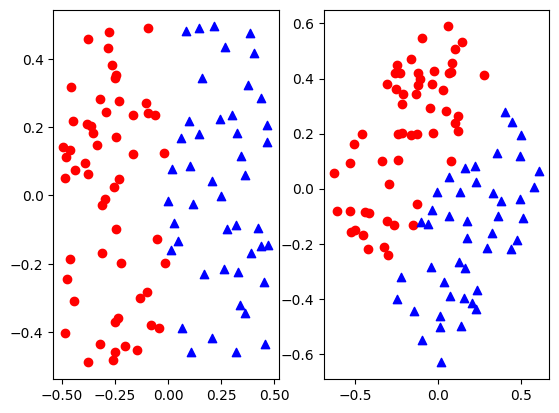

In [37]:
## Create a sample data
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5 # samples from uniform distribution over [-0.5,0.5]
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

## Rotate the data 45 degrees clockwise
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

## Add scatter plots of raw data
plt.subplot(1,2,1)
plt.scatter(Xs[ys==0,0],Xs[ys==0,1],c='r')
plt.scatter(Xs[ys==2,0],Xs[ys==2,1],c='b',marker='^')

plt.subplot(1,2,2)
plt.scatter(Xsr[ys==0,0],Xsr[ys==0,1],c='r')
plt.scatter(Xsr[ys==2,0],Xsr[ys==2,1],c='b',marker='^')
plt.show()

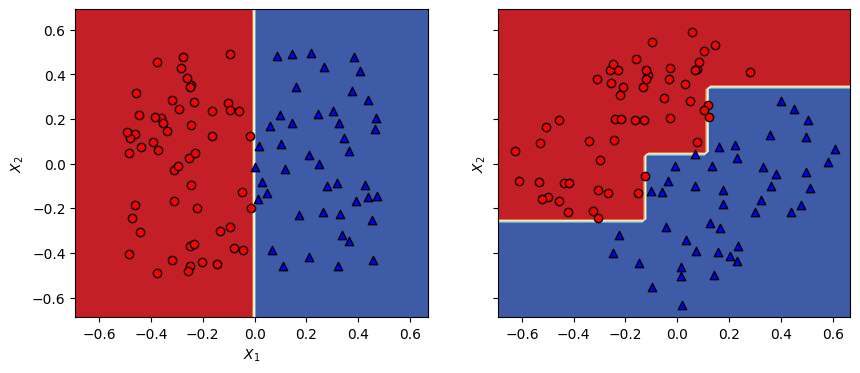

In [38]:
# create decision tree models to fit on the 2 datasets
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

## Create a plotting area
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

## Create datasets for decision boundaries
x_min, x_max = Xs[:, 0].min() - 0.2, Xs[:, 0].max() + 0.2
y_min, y_max = Xs[:, 1].min() - 0.2, Xs[:, 1].max() + 0.2
plot_step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

## plot the 1st decision boundary
Z1 = tree_clf_s.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
cs = axes[0].contourf(xx, yy, Z1, cmap=plt.cm.RdYlBu)

## plot the 2nd decision boundary
Z2 = tree_clf_sr.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
cs = axes[1].contourf(xx, yy, Z2, cmap=plt.cm.RdYlBu)

## Add scatter plots of raw data
axes[0].scatter(Xs[ys==0,0],Xs[ys==0,1],c='r', edgecolor='black')
axes[0].scatter(Xs[ys==2,0],Xs[ys==2,1],c='b', edgecolor='black', marker='^')
axes[0].set_xlabel('$X_1$')
axes[0].set_ylabel('$X_2$')

axes[1].scatter(Xsr[ys==0,0],Xsr[ys==0,1],c='r', edgecolor='black')
axes[1].scatter(Xsr[ys==2,0],Xsr[ys==2,1],c='b', edgecolor='black', marker='^')
axes[1].set_ylabel('$X_2$')

plt.show()


## Regression Tree

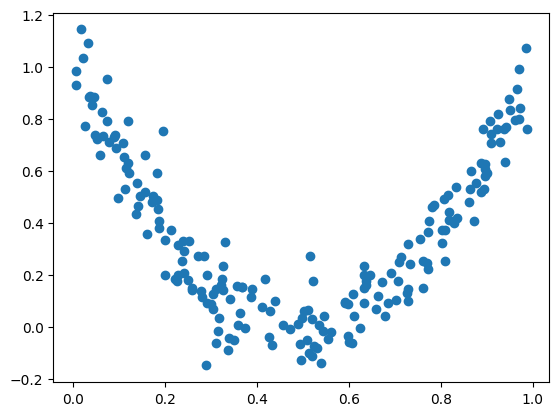

In [39]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

plt.scatter(X,y)
plt.show()

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

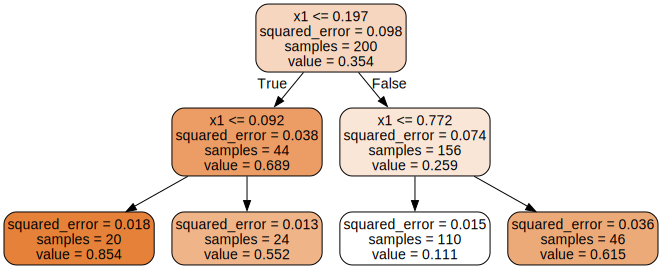

In [41]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg1.fit(X, y)

export_graphviz(
        tree_reg1,
        out_file='regression_tree.dot',
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file('regression_tree.dot')

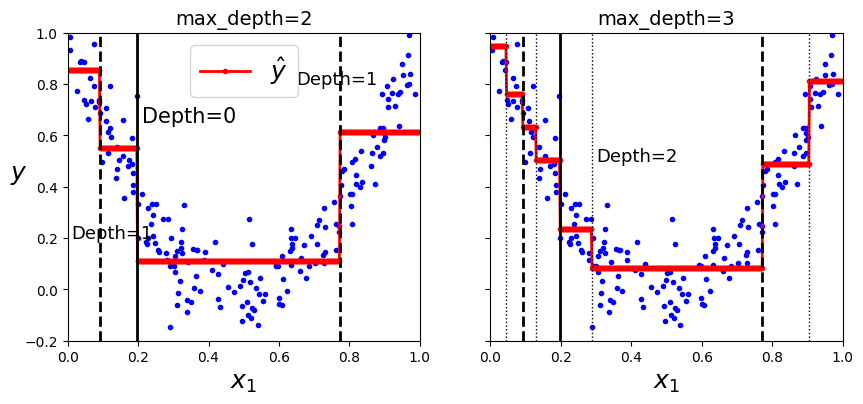

In [42]:
from sklearn.tree import DecisionTreeRegressor

## train 2 regression tree models
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

## create module to generate true vs. predicted comparison plot
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

## create subplots
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.show()

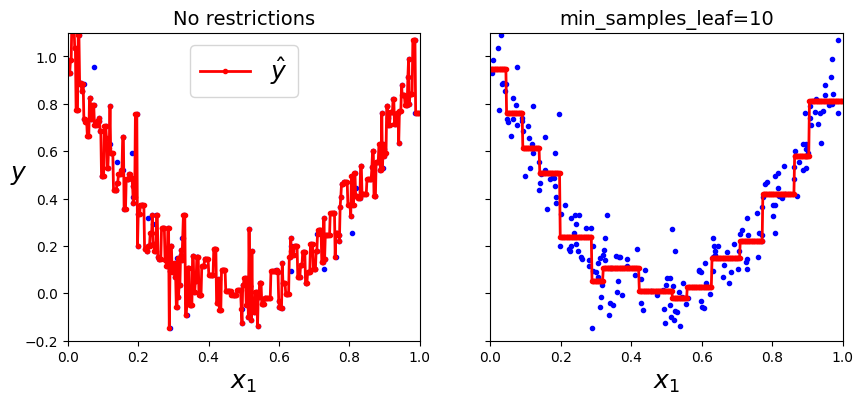

In [44]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

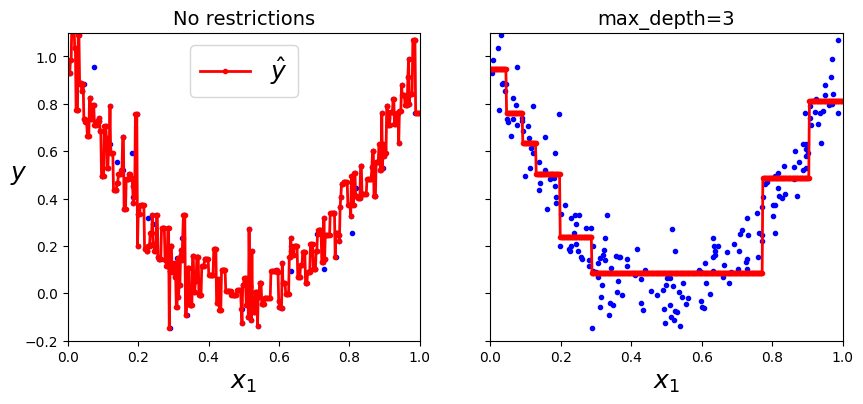

In [45]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("max_depth={}".format(tree_reg2.max_depth), fontsize=14)

plt.show()

# Ensemble Methods and Random Forests

* A group of predictors is called an `ensemble`
* `Ensemble Learning` is utilizing an `ensemble` of predictors and make predictions based on an aggregation of the predictions from each individual predictor

## Tossing coins experiment

"*More is Different*" - Philip W. Anderson

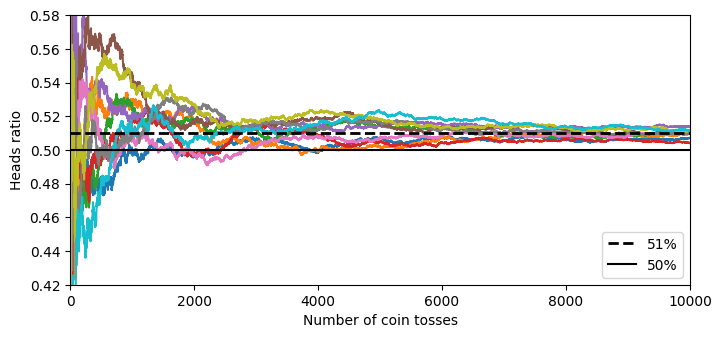

In [46]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)


plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

## Voting Classifier

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
X.shape, y.shape

((500, 2), (500,))

In [49]:
np.unique(y)

array([0, 1])

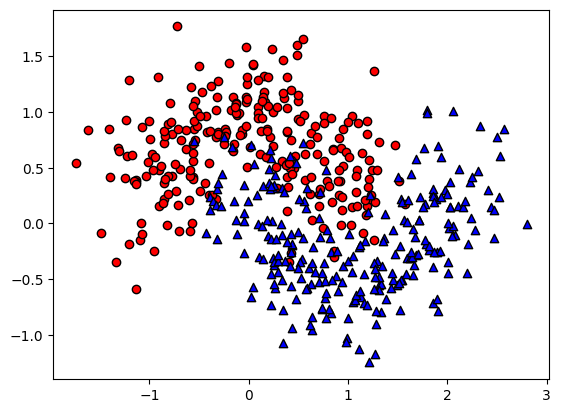

In [50]:
plt.scatter(X[y==0,0],X[y==0,1],c='r',marker='o',edgecolors='black')
plt.scatter(X[y==1,0],X[y==1,1],c='b',marker='^',edgecolors='black')
plt.show()

`VotingClassifier`: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

* `accuracy_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
* Evaluation metrics available in `scikit learn`: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [52]:
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


## Bagging Ensembles

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.904

In [54]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

accuracy_score(y_test, y_pred_tree)

0.856

Visualize the decision boundaries

In [55]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

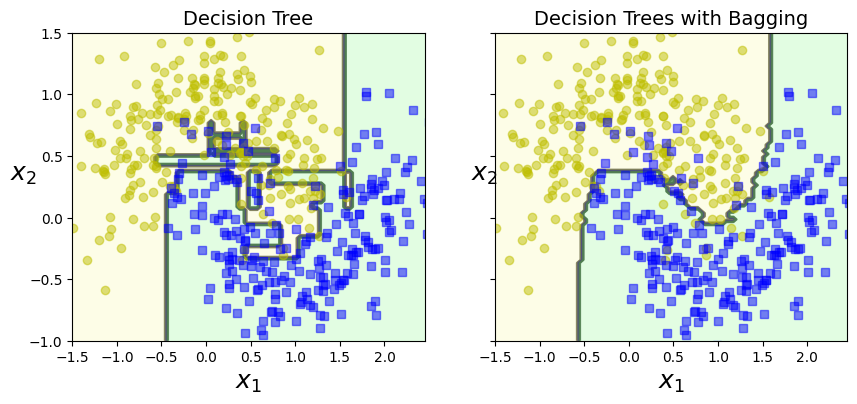

In [56]:

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

`Ensemble`'s predictions will likely generalize much better (with smaller variance) than a single Decision Tree!

## Random Forests

In [58]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500, 
    max_leaf_nodes=16, 
    random_state=42
)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.912

In [59]:
sum(y_pred_rf==y_test)/len(y_test)

0.912

![](https://miro.medium.com/max/936/0*R7idSv1bja3CLC8s.png)

In [60]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris['data'], iris['target'])
y_pred_rf = rnd_clf.predict(iris['data'])

accuracy_score(iris['target'],y_pred_rf)

1.0

In [61]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [62]:
df_feature_importance = pd.DataFrame({
    'feature': iris['feature_names'],
    'importance': rnd_clf.feature_importances_
})

df_feature_importance

,feature,importance
0,sepal length (cm),0.112492
1,sepal width (cm),0.023119
2,petal length (cm),0.441030
3,petal width (cm),0.423358


## AdaBoost

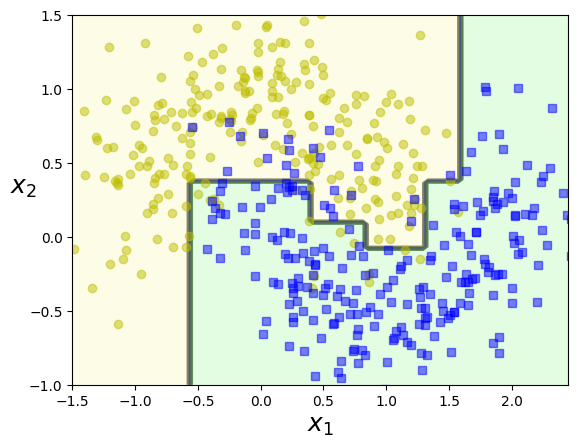

In [70]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=20,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

plot_decision_boundary(ada_clf, X, y)

In [71]:
y_pred_test_ada = ada_clf.predict(X_test)

accuracy_score(y_test, y_pred_test_ada)

0.92

## Gradient Boosting

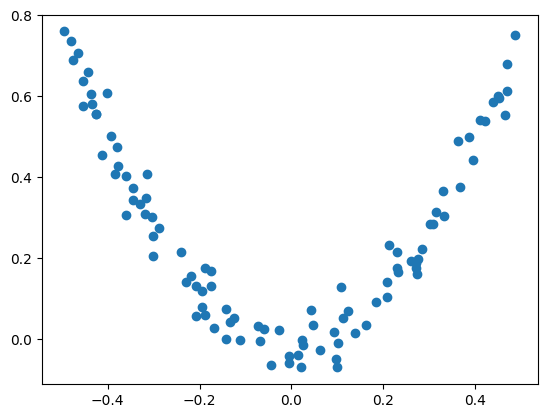

In [72]:
## Create a set of random samples
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

plt.scatter(X, y)
plt.show()

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [74]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [75]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [76]:
## make predictions

X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [77]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

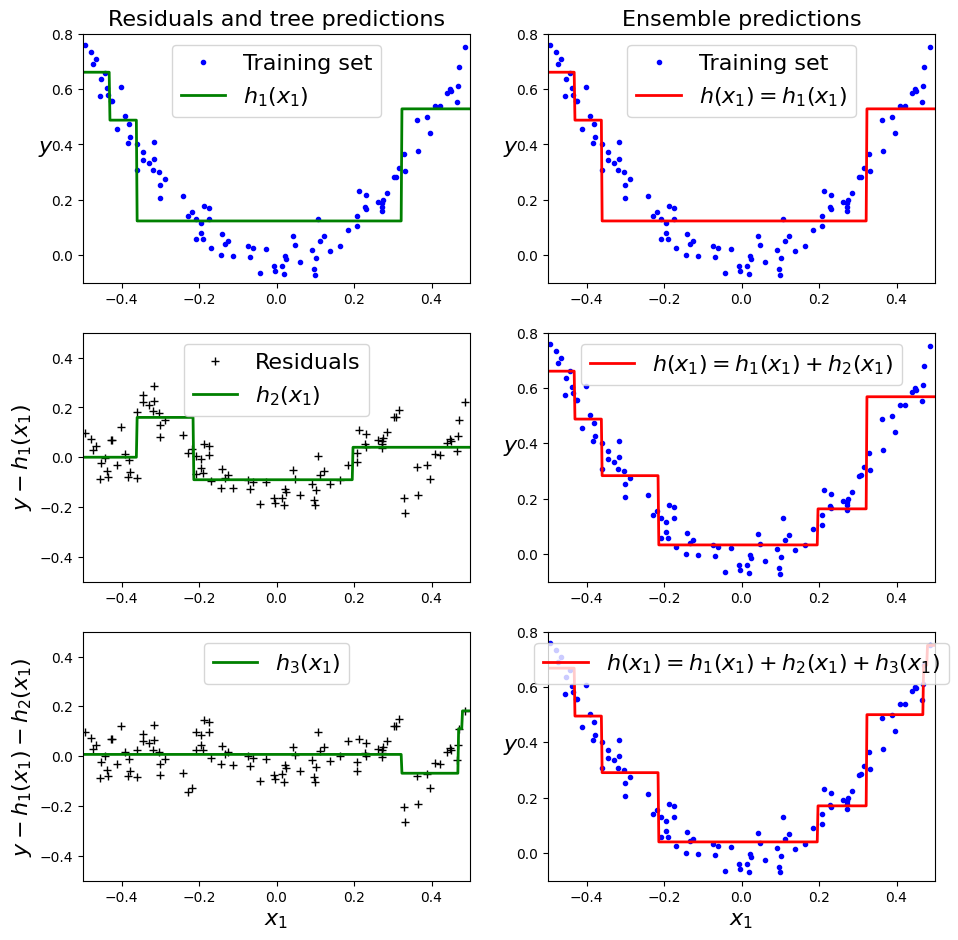

In [78]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
    max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42
)
gbrt.fit(X, y)

gbrt_slow = GradientBoostingRegressor(
    max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42
)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

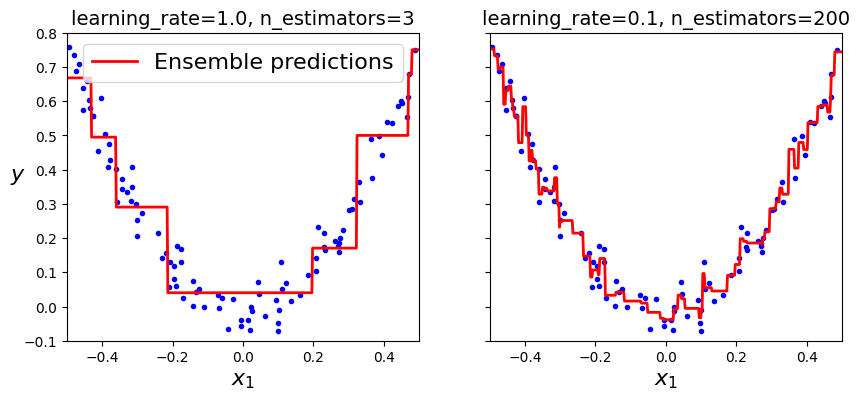

In [81]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

## Gradient Boosting with Early Stopping

In [87]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

In [88]:
bst_n_estimators

56

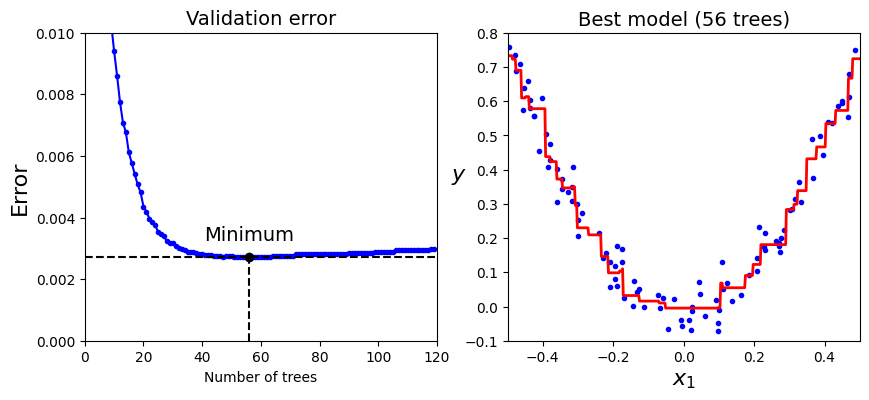

In [89]:
min_error = np.min(errors)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

# Appendix

## Entropy Visualization

In [90]:
import numpy as np
import matplotlib.pyplot as plt

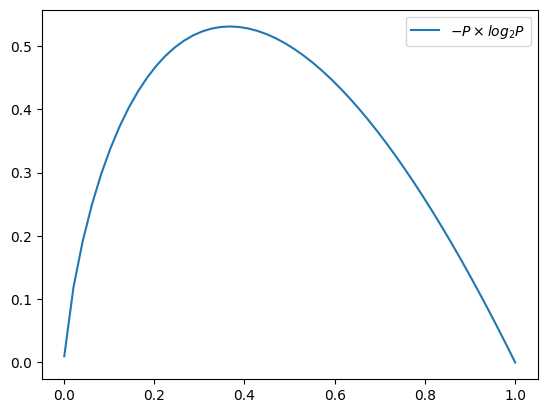

In [91]:
ps = np.linspace(start=0.001, stop=1, num=50)
hs = -ps*np.log2(ps)

plt.plot(ps,hs,label='$-P \\times log_2{P}$')
plt.legend()
plt.show()